# Image Classification - Learning

## A. Import Library

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'
for dirname, _, filenames in os.walk('/archive/fruits-360'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
print(tf. __version__)

2.10.0


## B. Preprocessing Data

In [4]:
train_path = "archive/fruits-360/Training/"
test_path = "archive/fruits-360/Validation/"

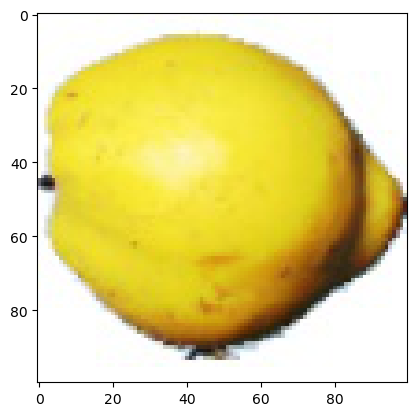

In [5]:
img = load_img(train_path + "Quince/r_305_100.jpg")
plt.imshow(img)
plt.axis("on")
plt.show()

In [6]:
img = img_to_array(img)
img.shape

(100, 100, 3)

## C. Create Model

In [7]:
def create_model():
    model = tf.keras.models.Sequential([ 
      tf.keras.layers.Conv2D(128, (3,3), activation='relu', input_shape=(100, 100, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Dropout(0.50),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(5000, activation='relu'),
      tf.keras.layers.Dense(1000, activation='relu'),
      tf.keras.layers.Dense(70, activation='softmax')
  ])
    
    from tensorflow.keras.optimizers import RMSprop
    model.compile(loss='categorical_crossentropy',
                optimizer="SGD",
                metrics=['accuracy'])
    return model

In [8]:
model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0

## D. Training Model

In [9]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 32,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 35133 images belonging to 70 classes.
Found 11804 images belonging to 70 classes.


In [10]:
hist = model.fit_generator(generator = train_generator, 
                   steps_per_epoch = 50,
                   epochs = 50,
                   validation_data = test_generator,
                   validation_steps = 50)

Epoch 1/50


C:\Users\A S U S\AppData\Local\Temp\ipykernel_27796\3106532498.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  hist = model.fit_generator(generator = train_generator,


50/50 [==============================] - 41s 798ms/step - loss: 4.2426 - accuracy: 0.0125 - val_loss: 4.2221 - val_accuracy: 0.0225
Epoch 2/50
50/50 [==============================] - 43s 857ms/step - loss: 4.2249 - accuracy: 0.0206 - val_loss: 4.1852 - val_accuracy: 0.0312
Epoch 3/50
50/50 [==============================] - 40s 806ms/step - loss: 4.1733 - accuracy: 0.0331 - val_loss: 4.0855 - val_accuracy: 0.0481
Epoch 4/50
50/50 [==============================] - 42s 834ms/step - loss: 3.9905 - accuracy: 0.0450 - val_loss: 3.8499 - val_accuracy: 0.0575
Epoch 5/50
50/50 [==============================] - 39s 787ms/step - loss: 3.6818 - accuracy: 0.0902 - val_loss: 3.0987 - val_accuracy: 0.2150
Epoch 6/50
50/50 [==============================] - 40s 802ms/step - loss: 3.2520 - accuracy: 0.1252 - val_loss: 2.8442 - val_accuracy: 0.1813
Epoch 7/50
50/50 [==============================] - 39s 782ms/step - loss: 3.0268 - accuracy: 0.1600 - val_loss: 2.4777 - val_accuracy: 0.2706
Epoch 8/50

## E. Training and Validation Accuracy

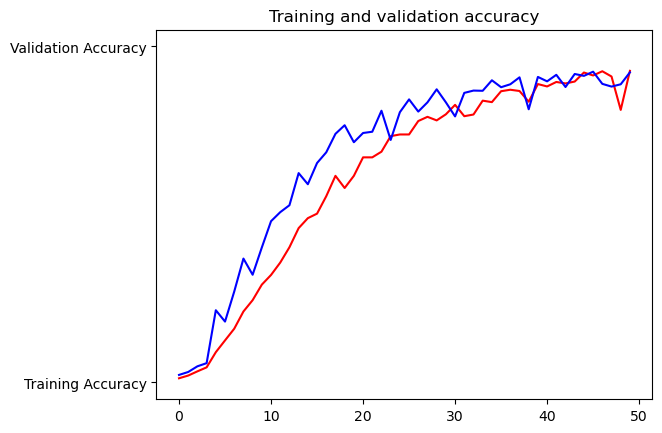

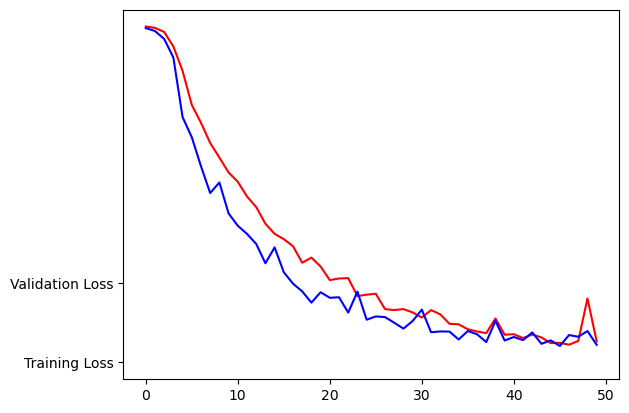

In [13]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
loss=hist.history['loss']
val_loss=hist.history['val_loss']

epochs=range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot(epochs, acc, 'r', "Training Accuracy")
plt.plot(epochs, val_acc, 'b', "Validation Accuracy")
plt.title('Training and validation accuracy')
plt.show()
print("")

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r', "Training Loss")
plt.plot(epochs, val_loss, 'b', "Validation Loss")
plt.show()

## F. Save Model

In [14]:
model.save("Fruitmodel.h5")

## G. Predicted Data

In [15]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [17]:
test_generator.classes[11687]

69

In [19]:
predictions = probability_model.predict(test_generator)

369/369 [==============================] - 49s 132ms/step


In [23]:
b=predictions[8]
print(b)

[0.01396071 0.01396071 0.01396071 0.01396071 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396072 0.01396071 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396367 0.01396071 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396071 0.03592419 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396071 0.01396071 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396071 0.01396071 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396071 0.01474322 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396071 0.01396071 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396071 0.01396071 0.01396073 0.01396071
 0.01396071 0.01396189 0.01396071 0.01396071 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396071 0.01396071 0.01396071 0.01396071
 0.01396071 0.01396071 0.01396071 0.01396071]


In [24]:
np.argmax(b)

21

## H. Testing

In [26]:
folder = 'archive/fruits-360/Validation'

sub_folders = [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

print(sub_folders[26])

Grape Pink
